## Aufgabe
Unter https://www.openml.org/d/41214 und https://www.openml.org/d/41215 finden Sie zwei Daten-
sätze eines französischen Automobilversicherers. Diese beinhalten Risikomerkmale und Schaden-
informationen zu Kraftfahrt-Haftpflicht-Versicherungsverträgen (eine Datensatzbeschreibung finden Sie
am Ende dieses Textes). Ihre Aufgabe besteht in der Modellierung der zu erwartenden Schadenhöhe
pro Versicherungsnehmer und Jahr anhand der Risikomerkmale der Kunden. Dieser Wert ist Basis für
die Berechnung eines fairen Versicherungsbeitrags.  

Die abhängige Variable ist definiert als ClaimAmount / Exposure.

### freMTPL2freq
The dataset freMTPL2freq contains risk features for 677,991 motor third-part liability policies (observed mostly on one year). See https://github.com/dutangc/CASdatasets for more details. The dataset is associated with 'Computational Actuarial Science with R' edited by Arthur Charpentier, CRC, 2018.  
- **IDpol**: ID des Vertrags
- **ClaimNb**: Anzahl Schäden im Versicherungszeitraum
- **Exposure**: Länge des Versicherungszeitraums (in Jahren) [Komponente der abhängigen Variable]
- **Area**: Area-Code des Versicherungsnehmers [unabhängige Variable]
- **VehPower**: Leistung des versicherten Kfz [unabhängige Variable]
- **VehAge**: Alter des versicherten Kfz [unabhängige Variable]
- **DrivAge**: Alter des Versicherungsnehmers [unabhängige Variable]
- **BonusMalus**: Schadenfreiheitsrabatt (französische Entsprechung der Schadenfreiheitsklasse) [unabhängige Variable]
- **VehBrand**: Marke des versicherten Kfz [unabhängige Variable]
- **VehGas**: Antrieb des versicherten Kfz [unabhängige Variable]
- **Density**: Anzahl der Einwohner pro km2 im Wohnort des Versicherungsnehmers [unabhängige Variable]
- **Region**: Region des Versicherungsnehmers [unabhängige Variable]

### freMTPL2sev
The dataset freMTPL2sev contains claim amounts for 26,639 motor third-part liability policies.
- **IDpol**: ID des Vertrags
- **ClaimAmount**: Höhe der einzelnen Schadenaufwände (mehrere Einträge pro Vertrag, falls im Zeitraum mehrere Schäden vorhanden waren.) [Komponente der abhängigen Variable]

In [40]:
import pandas as pd
import arff
import matplotlib.pyplot as plt

In [6]:
data_freq = arff.load('data/freMTPL2freq.arff')
data_sev = arff.load('data/freMTPL2sev.arff')

In [7]:
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

## Overview

### Freq

In [10]:
df_freq

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75000,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0.00274,'E',4.0,0.0,54.0,50.0,'B12',Regular,3317.0,'R93'
678009,6114327.0,0.0,0.00274,'E',4.0,0.0,41.0,95.0,'B12',Regular,9850.0,'R11'
678010,6114328.0,0.0,0.00274,'D',6.0,2.0,45.0,50.0,'B12',Diesel,1323.0,'R82'
678011,6114329.0,0.0,0.00274,'B',4.0,0.0,60.0,50.0,'B12',Regular,95.0,'R26'


In [35]:
df_freq.describe().apply(lambda s: s.apply('{0:.1f}'.format)) # disable scientific notation for better readability, round to 1

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678013.0,678013.0,678013.0,678013.0,678013.0,678013.0,678013.0,678013.0
mean,2621856.9,0.1,0.5,6.5,7.0,45.5,59.8,1792.4
std,1641782.8,0.2,0.4,2.1,5.7,14.1,15.6,3958.6
min,1.0,0.0,0.0,4.0,0.0,18.0,50.0,1.0
25%,1157951.0,0.0,0.2,5.0,2.0,34.0,50.0,92.0
50%,2272152.0,0.0,0.5,6.0,6.0,44.0,50.0,393.0
75%,4046274.0,0.0,1.0,7.0,11.0,55.0,64.0,1658.0
max,6114330.0,16.0,2.0,15.0,100.0,100.0,230.0,27000.0


In [24]:
print("Nulls in df_freq: ", df_freq.isnull().values.any())
print("Unique IDs in df_freq: ", df_freq["IDpol"].is_unique)

Nulls in df_freq:  False
Unique IDs in df_freq:  True


notes:
- no nulls (good data quality)
- no negative values
- ids are unique
- around 680k rows
- on avg, only 5% of policyholders have an accident during their contract

### Sev-

In [11]:
df_sev

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00
...,...,...
26634,3254353.0,1200.00
26635,3254353.0,1800.00
26636,3254353.0,1000.00
26637,2222064.0,767.55


In [34]:
df_sev.describe().apply(lambda s: s.apply('{0:.1f}'.format)) # disable scientific notation for better readability, round to 1

,IDpol,ClaimAmount
count,26639.0,26639.0
mean,2279863.8,2278.5
std,1577201.8,29297.5
min,139.0,1.0
25%,1087642.5,686.8
50%,2137413.0,1172.0
75%,3180162.0,1228.1
max,6113971.0,4075400.6


In [23]:
print("Nulls in df_sev: ", df_sev.isnull().values.any())
print("Unique IDs in df_sev: ", df_sev["IDpol"].is_unique)

Nulls in df_sev:  False
Unique IDs in df_sev:  False


notes:
- no nulls (good data quality)
- no negative values
- ids are NOT unique (which is because of the relational mapping)
- around 27k rows --> way less than other table, means that only a small part of contracts contains accidents --> fits with the 5% accident report number from other table

## Density

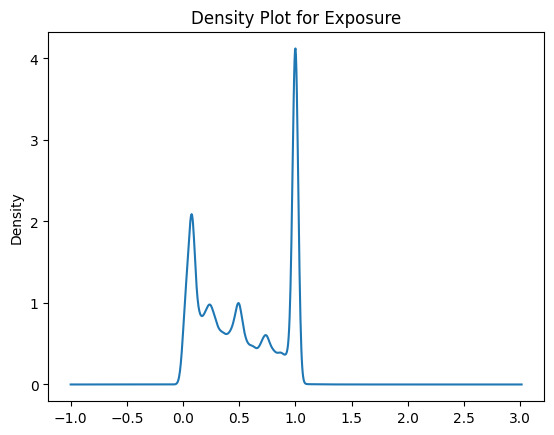

In [20]:
df_freq["Exposure"].plot.kde()
plt.title(f'Density Plot for Exposure')
plt.show()

most policy holders have an one year exposure, close to all are in between 0-1 year interval

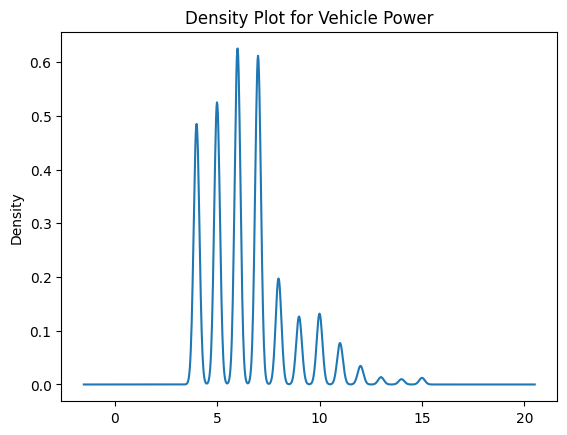

In [25]:
df_freq["VehPower"].plot.kde()
plt.title(f'Density Plot for Vehicle Power')
plt.show()

most vehicles have low-med power, only a few high

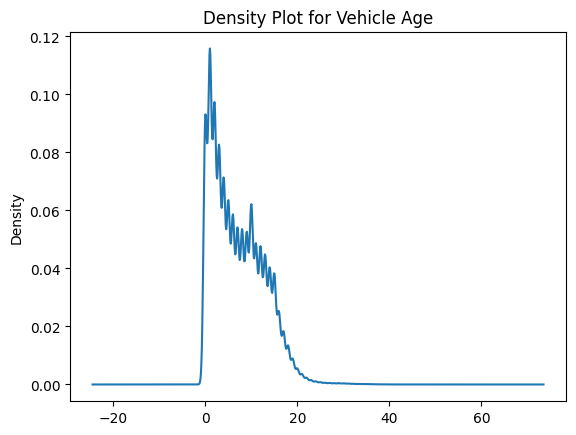

In [39]:
df_freq["VehAge"].where(df_freq["VehAge"] < 50).plot.kde()
plt.title(f'Density Plot for Vehicle Age')
plt.show()

most cars are below 10 years, a lot between 10 and 20, only very few are older (cutoff at 50 in plot)

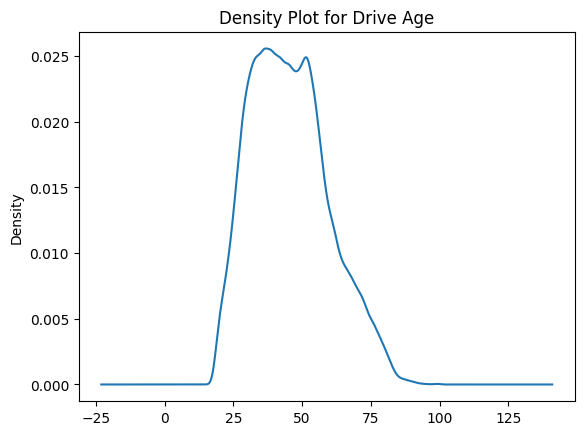

In [27]:
df_freq["DrivAge"].plot.kde()
plt.title(f'Density Plot for Drive Age')
plt.show()

drive age rises fast after the year of 18 and then drops off a bit slower around 60

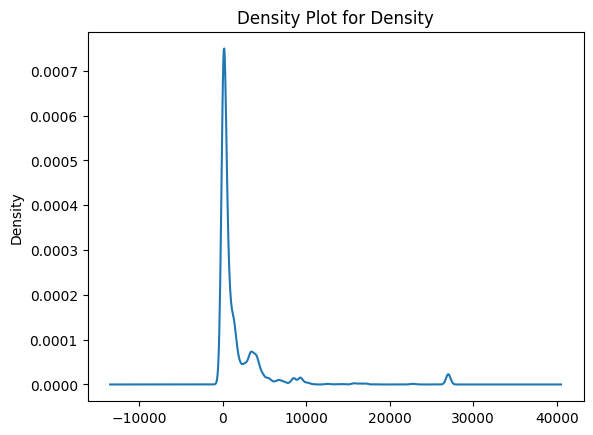

In [29]:
df_freq["Density"].plot.kde()
plt.title(f'Density Plot for Density')
plt.show()

most policy holders live in low-density regions

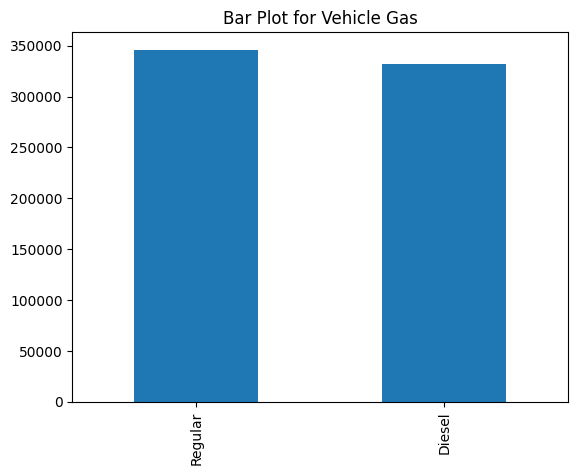

In [48]:
df_freq["VehGas"].value_counts().plot(kind='bar')
plt.title(f'Bar Plot for Vehicle Gas')
plt.show()

diesel and regular are pretty even

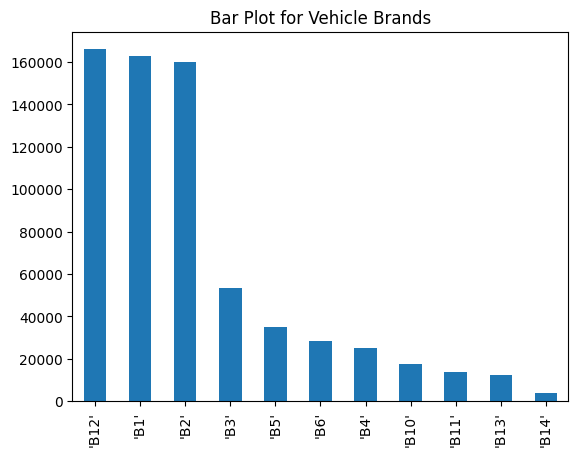

In [50]:
df_freq["VehBrand"].value_counts().plot(kind='bar')
plt.title(f'Bar Plot for Vehicle Brands')
plt.show()

just 3 brands cover most contracts

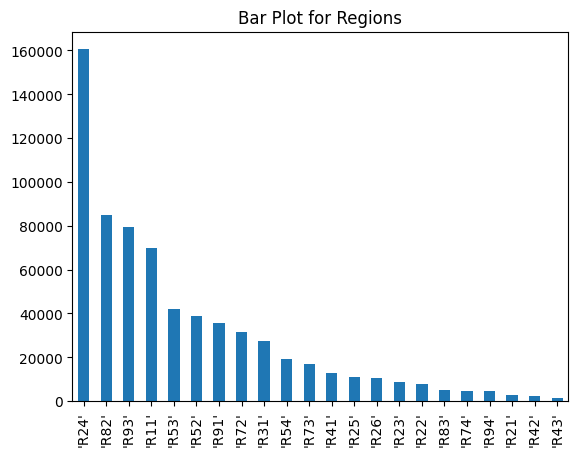

In [49]:
df_freq["Region"].value_counts().plot(kind='bar')
plt.title(f'Bar Plot for Regions')
plt.show()

only a few regions cover most of the policy holders

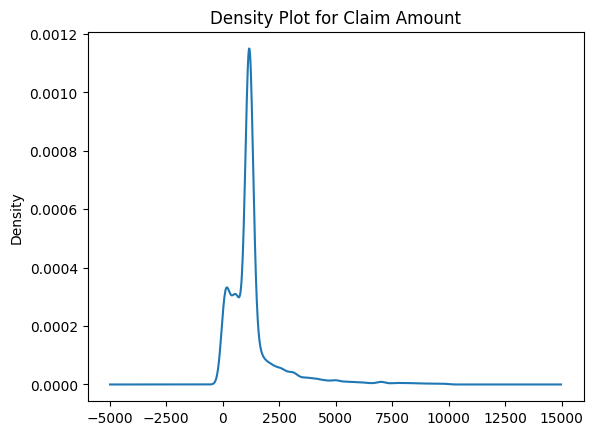

In [38]:
df_sev["ClaimAmount"].where(df_sev["ClaimAmount"] < 10_000).plot.kde()
plt.title(f'Density Plot for Claim Amount')
plt.show()

most claim amounts are between 1-2k, only few are larger(cutoff at 10k in plot)

## Correlations

In [47]:
corr = df_freq.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
IDpol,1.00,-0.13,-0.16,0.05,-0.16,0.06,-0.01,0.07
ClaimNb,-0.13,1.00,0.07,-0.00,-0.02,0.01,0.05,0.01
Exposure,-0.16,0.07,1.00,-0.05,0.15,0.17,-0.18,-0.07
VehPower,0.05,-0.00,-0.05,1.00,-0.01,0.03,-0.08,0.04
VehAge,-0.16,-0.02,0.15,-0.01,1.00,-0.06,0.08,-0.09
DrivAge,0.06,0.01,0.17,0.03,-0.06,1.00,-0.48,-0.00
BonusMalus,-0.01,0.05,-0.18,-0.08,0.08,-0.48,1.00,0.08
Density,0.07,0.01,-0.07,0.04,-0.09,-0.00,0.08,1.00


- large age correlation (neg) `-0.48`: the older, the lower the bonus malus
- low exposure correlation (neg) `-0.18`: the longer exposed, the fewer the bonus
- low age correlation (pos) `0.17`: the older, the longer exposed 
- low veh age correlation (neg): `-0.15`: the longer exposed, the older the vehicle 

obviously this thing is very prone to outliers but gives a good first insight

we could plot some more detailed correlations and also join the freq dataframe with the sev one, but not sure how much this would benefit us with the given task (e.g. plot how much damage a certain age group is responsible for etc )

also, this does only include numerical values for now. Interesting would be to also see regions and brands in this one (we could do it but yea time prio idk)